# BY: Mohamed Ashraf Gaber

## The Data.

### House Sales in King County, USA Dataset.
### I will be using data from a Kaggle data set:

#### https://www.kaggle.com/harlfoxem/housesalesprediction

### The model will predict house prices in King County, USA.

## Importing libraries I'll need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Reading the data.

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis and Data Visualization.

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Checking if the data has any null values. and getting the sum of it.

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### The data hasn't any null values.

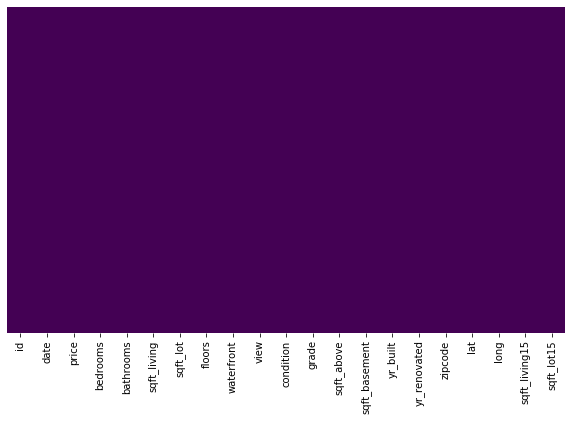

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

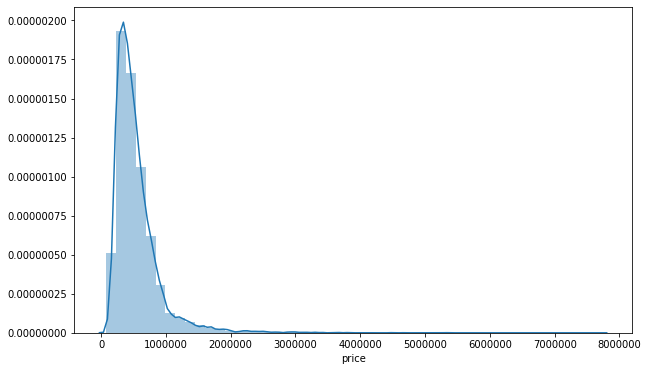

In [7]:
plt.figure(figsize=(10, 6))
sns.distplot(data['price'])

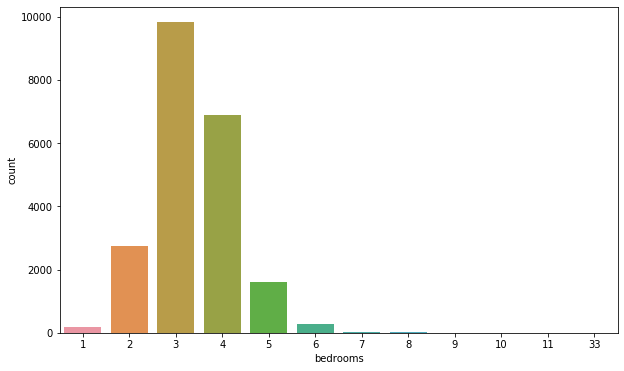

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data['bedrooms'])

### Geting the correlation between features and the label (price)

In [9]:
data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

### Visualizing the correlation.
#### There is a good correlation between features.

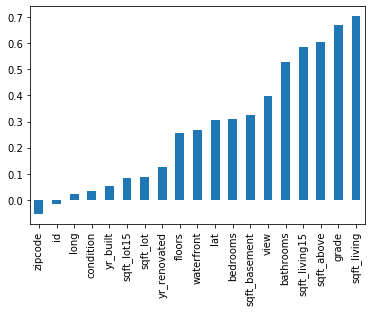

In [10]:
data.corr()['price'].sort_values()[:-1].plot(kind='bar')

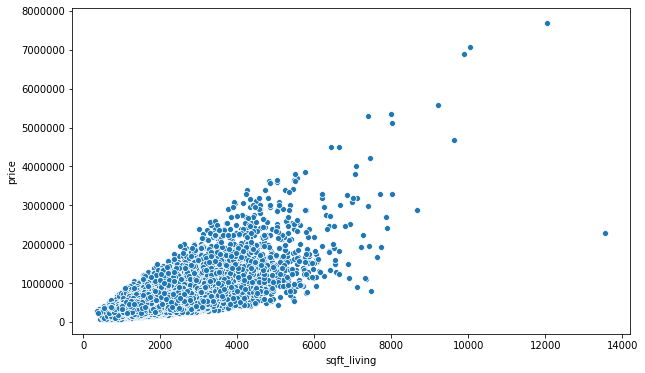

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data)

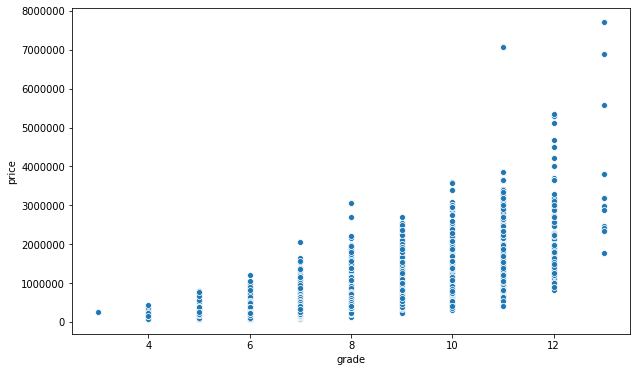

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', data=data)

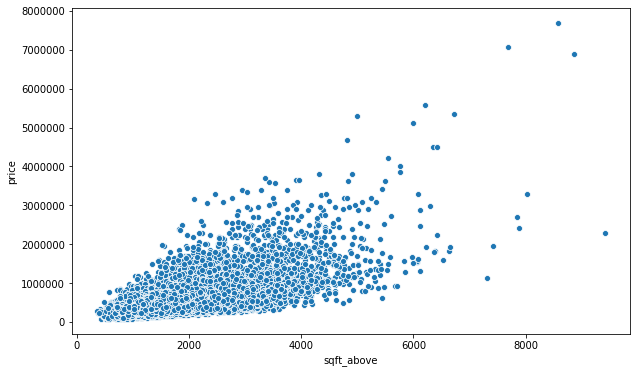

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_above', y='price', data=data)

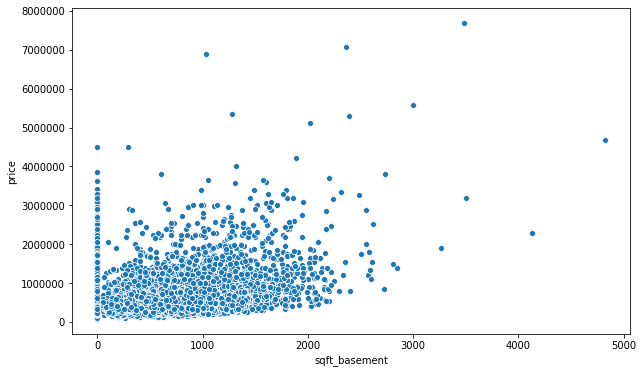

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_basement', y='price', data=data)

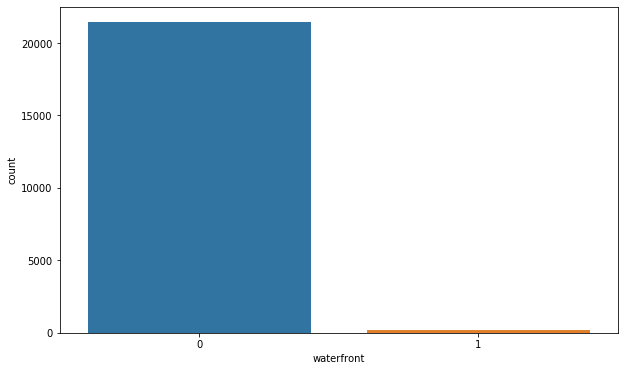

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data['waterfront'])

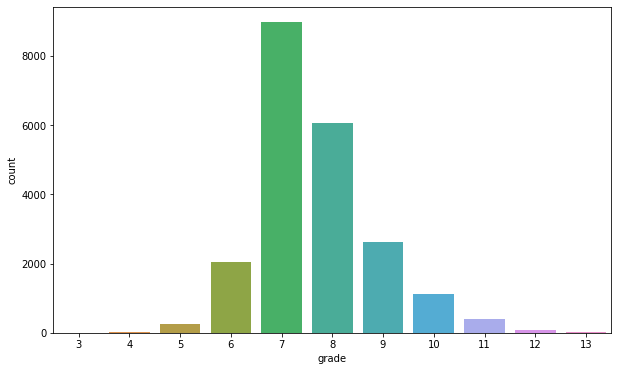

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data['grade'])

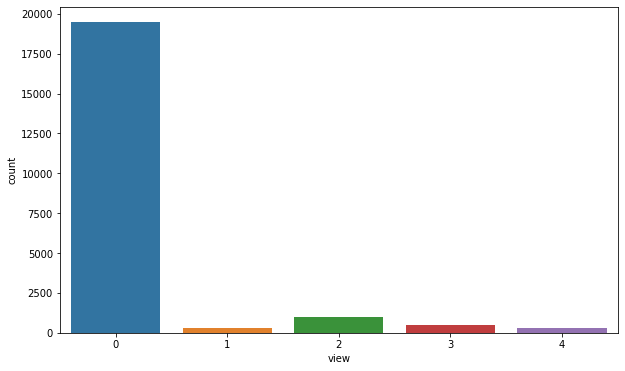

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data['view'])

### Geographical Properties.

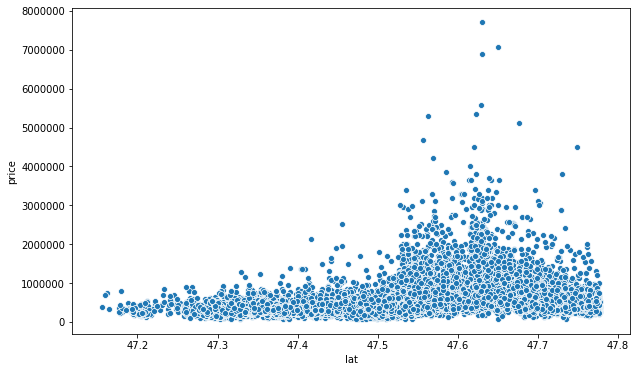

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='price', data=data)

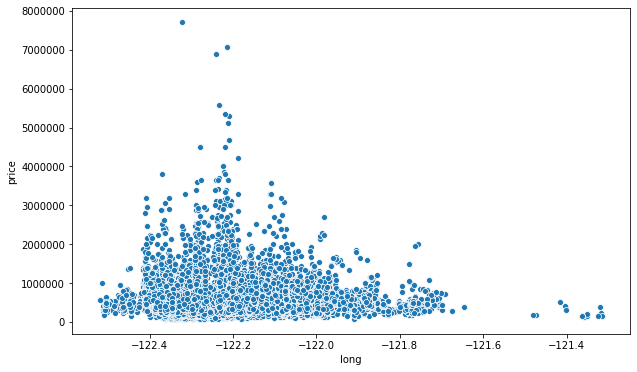

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='price', data=data)

### this visualize should show us the map of King County, USA. and the places that the price is high in there should have a different color. 
### But it seems that it doesn't show that. Because there are outliers in the data (the price of one house is 7 million) So I'll drop these outliers from this visualization.

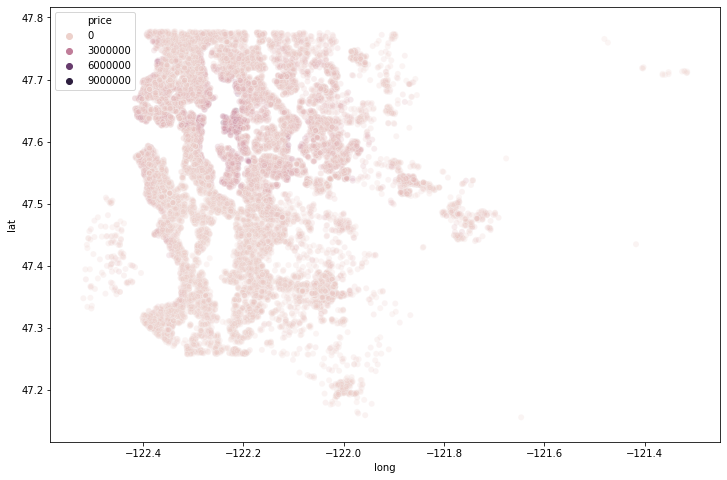

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=data, hue='price', alpha=0.2)

### Getting the top highest 20 houses.

In [21]:
data.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


#### Getting the length of 2% from the data.

In [22]:
len(data) * 0.02

431.94

### Creating a new variable which has 98% from the data.

In [23]:
without_2_percent = data.sort_values('price', ascending=False).iloc[432:]

### Repeating the visualization and see what happen.
#### Now the map is so clear and we can easily know what are the places that have the highest prices (The darker one).

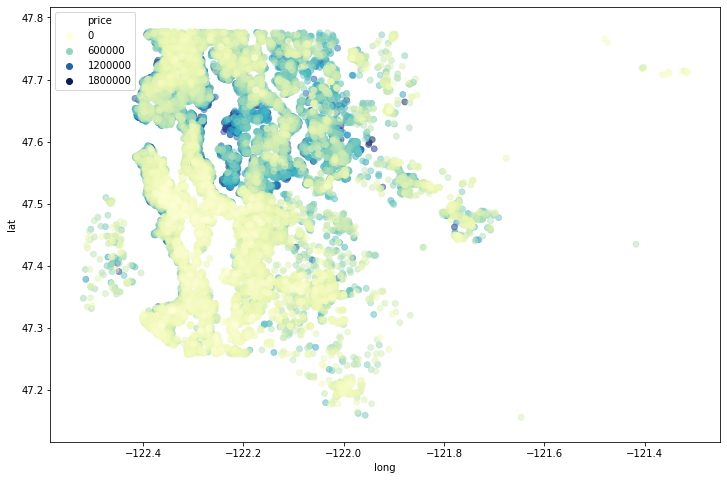

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=without_2_percent,
               hue='price', alpha=0.5, edgecolor=None, palette='YlGnBu')

## Data Analysis and Feature Engineering.

In [25]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### I have date feature but its type is object (string) and I can't use this type building the model so I'll create new columns that have data from this column with type I can use building the model.

In [26]:
data['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

#### Converting the object type to datetime64 type to the date column.

In [27]:
data['date'] = pd.to_datetime(data['date'])
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

#### Creating two new columns that will have the year and the month from the date column.

In [28]:
data['year'] = data['date'].apply(lambda date: date.year)
data['month'] = data['date'].apply(lambda date: date.month)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


#### Visualizing the correlation between the year column and the price.

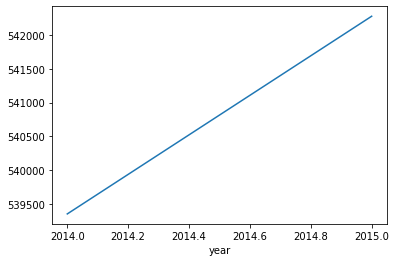

In [29]:
data.groupby('year')['price'].mean().plot()

#### Visualizing the correlation between the month column and the price.

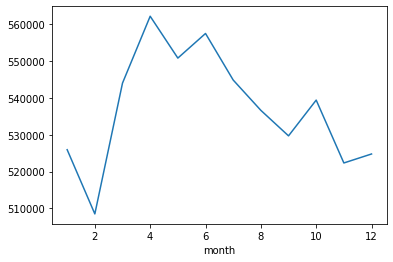

In [30]:
data.groupby('month')['price'].mean().plot()

#### I don't think that the zipcode column will affect the model.

In [31]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

### Dropping the columns I'll not use.

In [32]:
columns_no_need = ['id', 'date', 'zipcode']

data.drop(columns_no_need, axis=1, inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


## Setting the features to X variable and the label to y variable.

In [33]:
X = data.drop('price', axis=1).values
y = data['price'].values

## Splitting the data into a training set and testing set.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling the data using StandardScaler.

In [35]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### The data has 19 feature so the first layer in the neuron network will have 19 neurons.

In [36]:
X_train.shape

(15117, 19)

In [37]:
X_test.shape

(6480, 19)

## Creating the Model.

In [38]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

## Fitting the Model.

In [39]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
         batch_size=128, verbose=1, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 39us/sample - loss: 429739372573.5339 - val_loss: 420076003793.2247
Epoch 2/400
15117/15117 [==============================] - 0s 12us/sample - loss: 429239510413.4206 - val_loss: 418734292223.3679
Epoch 3/400
15117/15117 [==============================] - 0s 12us/sample - loss: 425458966628.2527 - val_loss: 411587780345.0469
Epoch 4/400
15117/15117 [==============================] - 0s 12us/sample - loss: 411807659508.1119 - val_loss: 391094981083.3383
Epoch 5/400
15117/15117 [==============================] - 0s 12us/sample - loss: 380414879408.9664 - val_loss: 350119220646.2421
Epoch 6/400
15117/15117 [==============================] - 0s 12us/sample - loss: 326092588267.3906 - val_loss: 287897852475.4173
Epoch 7/400
15117/15117 [==============================] - 0s 12us/sample - loss: 254304709345.9411 - val_loss: 214640882483.2000
Epoch 8/400
15117/15117 [================

15117/15117 [==============================] - 0s 11us/sample - loss: 34528520877.9181 - val_loss: 36976756007.8222
Epoch 65/400
15117/15117 [==============================] - 0s 11us/sample - loss: 34437792756.0103 - val_loss: 36891186583.0716
Epoch 66/400
15117/15117 [==============================] - 0s 11us/sample - loss: 34373213888.9526 - val_loss: 36800778154.0346
Epoch 67/400
15117/15117 [==============================] - 0s 11us/sample - loss: 34306470977.2320 - val_loss: 36727199996.8395
Epoch 68/400
15117/15117 [==============================] - 0s 11us/sample - loss: 34226455837.9234 - val_loss: 36647861331.4370
Epoch 69/400
15117/15117 [==============================] - 0s 11us/sample - loss: 34152252453.3238 - val_loss: 36600943825.8568
Epoch 70/400
15117/15117 [==============================] - 0s 11us/sample - loss: 34074587235.9817 - val_loss: 36498380122.3901
Epoch 71/400
15117/15117 [==============================] - 0s 11us/sample - loss: 34005264657.5273 - val_loss

15117/15117 [==============================] - 0s 11us/sample - loss: 31640336317.4810 - val_loss: 34026773466.0741
Epoch 128/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31622944516.5554 - val_loss: 33997402491.2593
Epoch 129/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31587742219.4816 - val_loss: 33966800759.4667
Epoch 130/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31558645161.7353 - val_loss: 33948606737.0667
Epoch 131/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31547599128.9785 - val_loss: 33908253728.8691
Epoch 132/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31523695177.6654 - val_loss: 33891130557.6296
Epoch 133/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31470359364.0262 - val_loss: 33850210966.4395
Epoch 134/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31451685588.7322 - v

15117/15117 [==============================] - 0s 11us/sample - loss: 30295045442.4343 - val_loss: 32625972873.7975
Epoch 191/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30278184963.8103 - val_loss: 32609814275.1605
Epoch 192/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30262829490.0671 - val_loss: 32595091557.1358
Epoch 193/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30266597593.3045 - val_loss: 32561974213.8469
Epoch 194/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30230916147.5489 - val_loss: 32545805992.1383
Epoch 195/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30214426842.6593 - val_loss: 32527202678.2025
Epoch 196/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30190437251.2938 - val_loss: 32521073767.6642
Epoch 197/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30191451532.2014 - v

15117/15117 [==============================] - 0s 11us/sample - loss: 29295249911.1601 - val_loss: 31618964012.2469
Epoch 254/400
15117/15117 [==============================] - 0s 11us/sample - loss: 29278967514.2867 - val_loss: 31590577928.2173
Epoch 255/400
15117/15117 [==============================] - 0s 11us/sample - loss: 29263512076.3622 - val_loss: 31571693340.4444
Epoch 256/400
15117/15117 [==============================] - 0s 11us/sample - loss: 29237218327.6407 - val_loss: 31570322080.5531
Epoch 257/400
15117/15117 [==============================] - 0s 11us/sample - loss: 29234804946.6661 - val_loss: 31545615863.1506
Epoch 258/400
15117/15117 [==============================] - 0s 12us/sample - loss: 29210126658.8408 - val_loss: 31534798908.6815
Epoch 259/400
15117/15117 [==============================] - 0s 11us/sample - loss: 29197533350.3653 - val_loss: 31524009028.2667
Epoch 260/400
15117/15117 [==============================] - 0s 11us/sample - loss: 29186825731.5563 - v

15117/15117 [==============================] - 0s 11us/sample - loss: 28433659845.7451 - val_loss: 30723518888.7704
Epoch 317/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28397087815.9381 - val_loss: 30725812815.6444
Epoch 318/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28381656861.1783 - val_loss: 30695858155.7728
Epoch 319/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28353301058.3497 - val_loss: 30714183801.3630
Epoch 320/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28369925762.3624 - val_loss: 30677211672.0198
Epoch 321/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28356752878.6251 - val_loss: 30665834308.8988
Epoch 322/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28322210047.9153 - val_loss: 30654719640.9679
Epoch 323/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28313195213.9583 - v

15117/15117 [==============================] - 0s 11us/sample - loss: 27671807860.4591 - val_loss: 30045921548.0099
Epoch 380/400
15117/15117 [==============================] - 0s 11us/sample - loss: 27662738304.8552 - val_loss: 30039491561.2444
Epoch 381/400
15117/15117 [==============================] - 0s 11us/sample - loss: 27658285609.8284 - val_loss: 30022852309.6494
Epoch 382/400
15117/15117 [==============================] - 0s 11us/sample - loss: 27661130513.2225 - val_loss: 30020057062.7160
Epoch 383/400
15117/15117 [==============================] - 0s 11us/sample - loss: 27605815289.9036 - val_loss: 30013689112.6519
Epoch 384/400
15117/15117 [==============================] - 0s 11us/sample - loss: 27627931247.3279 - val_loss: 29995711874.8444
Epoch 385/400
15117/15117 [==============================] - 0s 11us/sample - loss: 27626141211.9421 - val_loss: 29998252997.8469
Epoch 386/400
15117/15117 [==============================] - 0s 11us/sample - loss: 27594871241.0304 - v

### Visualizing the loss for the training and testing sets.

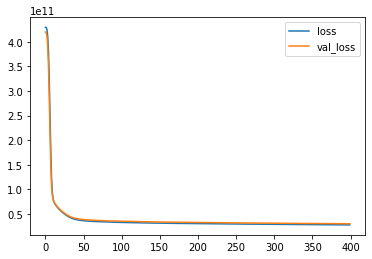

In [40]:
losses = pd.DataFrame(model.history.history)

losses.plot()

## Getting the prediction.

In [41]:
prediction = model.predict(X_test)

## Evaluation on Test Data.

In [42]:
mean_absolute_error(y_test, prediction)

103666.21414207175

In [43]:
np.sqrt(mean_squared_error(y_test, prediction))

172816.39113857155

In [44]:
explained_variance_score(y_test, prediction)

0.774798105075873

In [45]:
data['price'].mean()

540296.5735055795

In [46]:
data['price'].median()

450000.0

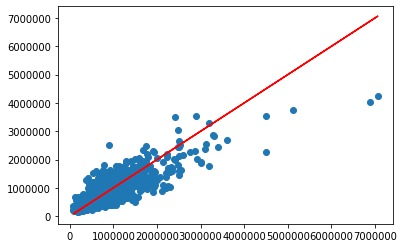

In [47]:
# Our predictions.
plt.scatter(y_test, prediction)

# Perfect predictions.
plt.plot(y_test, y_test, 'red')